## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

## Fetching data from yahoo finance website

In [3]:
data = yf.Ticker('AAPL')
data

yfinance.Ticker object <AAPL>

In [4]:
df = data.history('120mo')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-02 00:00:00-05:00,17.398573,17.440842,17.283977,17.318731,234684800,0.0,0.0
2014-01-03 00:00:00-05:00,17.310275,17.336574,16.921085,16.938307,392467600,0.0,0.0
2014-01-06 00:00:00-05:00,16.827779,17.120530,16.707233,17.030670,412610800,0.0,0.0
2014-01-07 00:00:00-05:00,17.042889,17.094237,16.842502,16.908880,317209200,0.0,0.0
2014-01-08 00:00:00-05:00,16.870364,17.081710,16.866608,17.015959,258529600,0.0,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,0.0,0.0
2023-12-28 00:00:00-05:00,194.139999,194.660004,193.169998,193.580002,34049900,0.0,0.0
2023-12-29 00:00:00-05:00,193.899994,194.399994,191.729996,192.529999,42628800,0.0,0.0
2024-01-02 00:00:00-05:00,187.149994,188.440002,185.184998,185.865005,39449704,0.0,0.0


In [7]:
df = df.reset_index()

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-01-02 00:00:00-05:00,17.398573,17.440842,17.283977,17.318731,234684800,0.0,0.0
1,2014-01-03 00:00:00-05:00,17.310275,17.336574,16.921085,16.938307,392467600,0.0,0.0
2,2014-01-06 00:00:00-05:00,16.827779,17.120530,16.707233,17.030670,412610800,0.0,0.0
3,2014-01-07 00:00:00-05:00,17.042889,17.094237,16.842502,16.908880,317209200,0.0,0.0
4,2014-01-08 00:00:00-05:00,16.870364,17.081710,16.866608,17.015959,258529600,0.0,0.0


In [9]:
df = df.drop(['Date', 'Dividends', 'Stock Splits'], axis=1)

In [10]:
df.head()

,Open,High,Low,Close,Volume
0,17.398573,17.440842,17.283977,17.318731,234684800
1,17.310275,17.336574,16.921085,16.938307,392467600
2,16.827779,17.120530,16.707233,17.030670,412610800
3,17.042889,17.094237,16.842502,16.908880,317209200
4,16.870364,17.081710,16.866608,17.015959,258529600


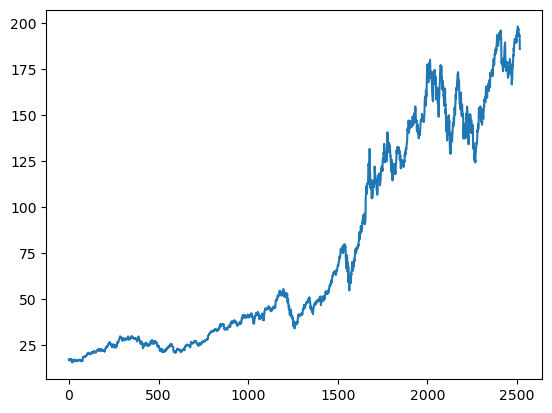

In [11]:
plt.plot(df.Close)

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2512    181.614205
2513    181.730650
2514    181.882712
2515    182.014799
2516    182.096293
Name: Close, Length: 2517, dtype: float64

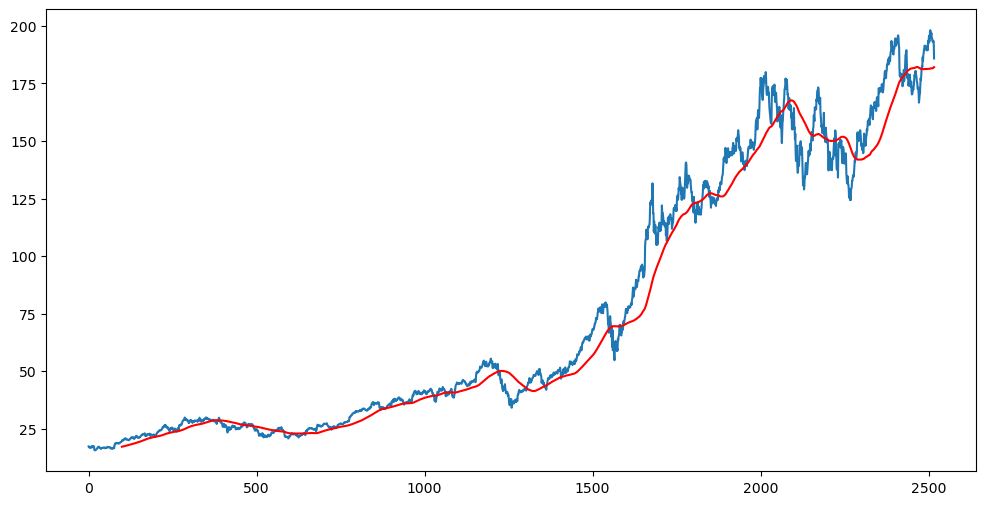

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2512    178.502683
2513    178.719123
2514    178.927155
2515    179.127945
2516    179.281169
Name: Close, Length: 2517, dtype: float64

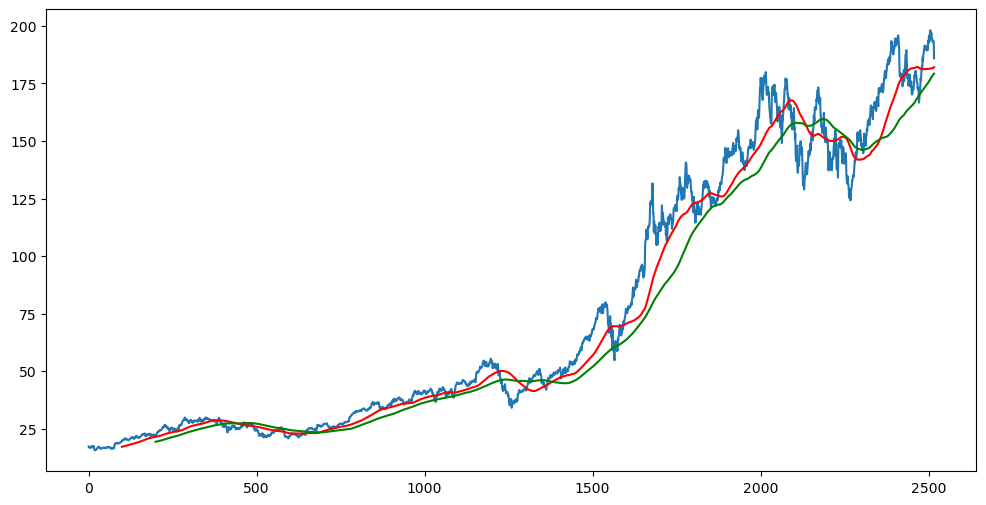

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(2517, 5)

In [17]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01407617],
       [0.01087042],
       [0.01164875],
       ...,
       [0.96091576],
       [1.        ],
       [0.98492913]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
# we have to provide the data to lSTM model that's wht we are converting it into numpy arrays
x_train, y_train, = np.array(x_train), np.array(y_train)

In [21]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50

52/52 [==============================] - 29s 360ms/step - loss: 0.0223
Epoch 2/50
52/52 [==============================] - 20s 389ms/step - loss: 0.0051
Epoch 3/50
52/52 [==============================] - 19s 369ms/step - loss: 0.0048
Epoch 4/50
52/52 [==============================] - 19s 358ms/step - loss: 0.0038
Epoch 5/50
52/52 [==============================] - 19s 364ms/step - loss: 0.0035
Epoch 6/50
52/52 [==============================] - 19s 370ms/step - loss: 0.0030
Epoch 7/50
52/52 [==============================] - 18s 354ms/step - loss: 0.0033
Epoch 8/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0028
Epoch 9/50
52/52 [==============================] - 18s 347ms/step - loss: 0.0029
Epoch 10/50
52/52 [==============================] - 17s 335ms/step - loss: 0.0031
Epoch 11/50
52/52 [==============================] - 18s 345ms/step - loss: 0.0032
Epoch 12/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0028
Epoch 13/50

In [25]:
model.save('keras_model.h5')

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
past_100_days = data_training.tail(100)

In [37]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [38]:
final_df.head()

,Close
0,108.996155
1,110.580391
2,107.291763
3,110.857521
4,112.819420


In [39]:
input_data = scaler.fit_transform(final_df)

In [40]:
input_data.shape

(856, 1)

In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [42]:
x_test, y_test, = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [43]:
# Making Predictons

y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 94ms/step


In [44]:
y_predicted.shape

(756, 1)

In [45]:
y_predicted

array([[0.20209993],
       [0.21169502],
       [0.22352883],
       [0.23610517],
       [0.24777651],
       [0.25689775],
       [0.2630362 ],
       [0.2664833 ],
       [0.26766276],
       [0.26700133],
       [0.26513663],
       [0.26250544],
       [0.25916755],
       [0.2552152 ],
       [0.25120977],
       [0.24852216],
       [0.24839613],
       [0.25151622],
       [0.25845882],
       [0.2692358 ],
       [0.2826645 ],
       [0.29644427],
       [0.30864525],
       [0.31800735],
       [0.32407784],
       [0.32707077],
       [0.32767534],
       [0.3267213 ],
       [0.32489178],
       [0.32265174],
       [0.3202686 ],
       [0.3179304 ],
       [0.3154854 ],
       [0.31247428],
       [0.30849195],
       [0.30345362],
       [0.29734683],
       [0.29027843],
       [0.2823359 ],
       [0.27334684],
       [0.26332927],
       [0.25307763],
       [0.24343482],
       [0.23469433],
       [0.22700788],
       [0.22058158],
       [0.21516322],
       [0.210

In [46]:
scaler.scale_

array([0.01071754])

In [47]:
scale_factor = 1/0.00853401
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

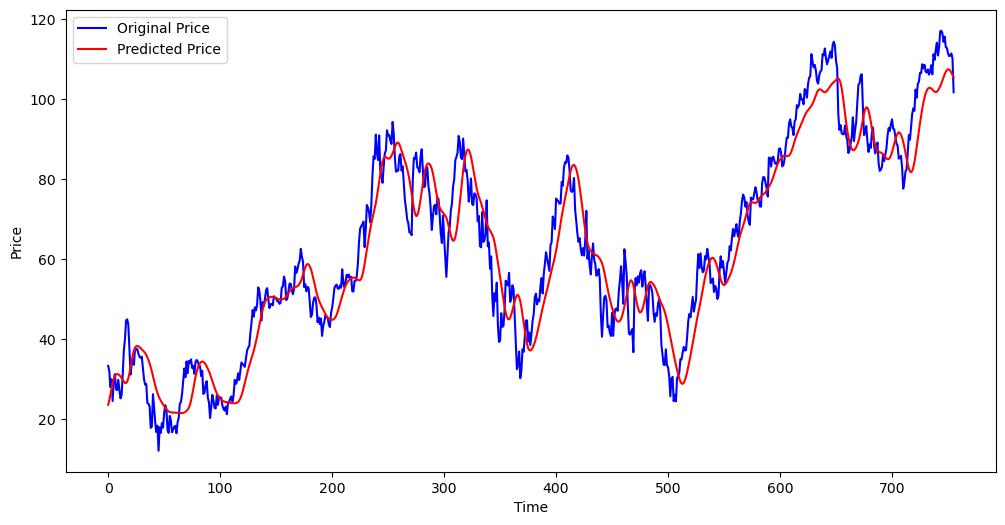

In [48]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()